In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import timeit
import sympy as sym
from sympy import *
from datetime import date
from datetime import time
from datetime import datetime


dataFile = pd.read_csv('stmf.csv', skiprows = 2) #save read-in csv into "df" variable

dataFile

,CountryCode,Year,Week,Sex,D0_14,D15_64,D65_74,D75_84,D85p,DTotal,R0_14,R15_64,R65_74,R75_84,R85p,RTotal,Split,SplitSex,Forecast
0,AUS2,2015,1,m,5.037600,210.962400,204.0,398.0,394.0,1212.0,0.000113,0.001395,0.010716,0.041683,0.119154,0.005326,1,0,0
1,AUS2,2015,1,f,6.758007,141.241993,154.0,323.0,676.0,1301.0,0.000160,0.000929,0.007869,0.028785,0.118644,0.005641,1,0,0
2,AUS2,2015,1,b,11.795607,352.204393,358.0,721.0,1070.0,2513.0,0.000136,0.001161,0.009273,0.034714,0.118831,0.005484,1,0,0
3,AUS2,2015,2,m,5.648218,166.351782,216.0,343.0,399.0,1130.0,0.000127,0.001100,0.011347,0.035923,0.120666,0.004966,1,0,0
4,AUS2,2015,2,f,6.983274,149.016726,147.0,290.0,646.0,1239.0,0.000166,0.000980,0.007511,0.025844,0.113378,0.005372,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102397,USA,2021,12,f,208.000000,5465.000000,4850.0,6732.0,9588.0,26843.0,0.000371,0.002674,0.014102,0.036469,0.115087,0.008346,0,0,1
102398,USA,2021,12,b,476.000000,14862.000000,11425.0,13696.0,15872.0,56331.0,0.000415,0.003637,0.017725,0.041560,0.121343,0.008889,0,0,1
102399,USA,2021,13,m,258.000000,8950.000000,6528.0,6782.0,5966.0,28484.0,0.000441,0.004383,0.021712,0.046787,0.125622,0.009127,0,0,1
102400,USA,2021,13,f,183.000000,5066.000000,4774.0,6356.0,9046.0,25425.0,0.000327,0.002479,0.013881,0.034432,0.108581,0.007905,0,0,1


In [2]:
df = dataFile.iloc[:, : 10] #Drop r values

df = df[df.Sex != 'm']  #drop male/female values
df = df[df.Sex != 'f']
df = df.drop(columns = 'Sex') #then drop sex column
convert_dict = {'CountryCode': str,
                'Year': str,
                'D0_14': int,
                'D15_64': int,
                'D65_74': int,
                'D75_84': int,
                'D85p': int,
                'DTotal': int}

df = df.astype(convert_dict) #convert columns to the data types in dictionary
df

,CountryCode,Year,Week,D0_14,D15_64,D65_74,D75_84,D85p,DTotal
2,AUS2,2015,1,11,352,358,721,1070,2513
5,AUS2,2015,2,12,315,363,633,1045,2369
8,AUS2,2015,3,8,305,379,640,1035,2368
11,AUS2,2015,4,9,298,366,666,1015,2355
14,AUS2,2015,5,9,302,346,596,1016,2270
...,...,...,...,...,...,...,...,...,...
102389,USA,2021,9,459,15605,12591,14811,16875,60341
102392,USA,2021,10,454,15028,12122,14222,16557,58383
102395,USA,2021,11,463,14774,11641,13690,15964,56532
102398,USA,2021,12,476,14862,11425,13696,15872,56331


In [3]:
dfUSA2020 = df[
    (df['CountryCode'] == 'USA') #query for deaths in 2020-2021
    & (df["Year"].isin(['2020']))
]

dfUSA2020 = dfUSA2020.set_index('Week')

dfUSA2020 = dfUSA2020.drop(columns = ['CountryCode', 'Year'])

dfUSA2020

,D0_14,D15_64,D65_74,D75_84,D85p,DTotal
Week,,,,,,
1,583,14858,11788,14544,18389,60162
2,588,14624,12091,14723,18697,60723
3,589,14406,11750,14262,18342,59349
4,589,14298,11794,14403,18066,59150
5,573,14203,11670,14145,18226,58817
6,624,14547,11635,14445,18209,59460
7,588,14259,11631,14359,17959,58796
8,537,14337,11582,14341,18093,58890
9,618,14500,11717,14440,18036,59311


In [4]:
sundays2020 = ['2019-12-29',
               '2020-01-05',
               '2020-01-12',
               '2020-01-19',
               '2020-01-26',
               '2020-02-02',
               '2020-02-09',
               '2020-02-16',
               '2020-02-23',
               '2020-03-01',
               '2020-03-08',
               '2020-03-15',
               '2020-03-22',
               '2020-03-29',
               '2020-04-05',
               '2020-04-12',
               '2020-04-19',
               '2020-04-26',
               '2020-05-03',
               '2020-05-10',
               '2020-05-17',
               '2020-05-24',
               '2020-05-31',
               '2020-06-07',
               '2020-06-14',
               '2020-06-21',
               '2020-06-28',
               '2020-07-05',
               '2020-07-12',
               '2020-07-19',
               '2020-07-26',
               '2020-08-02',
               '2020-08-09',
               '2020-08-16',
               '2020-08-23',
               '2020-08-30',
               '2020-09-06',
               '2020-09-13',
               '2020-09-20',
               '2020-09-27',
               '2020-10-04',
               '2020-10-11',
               '2020-10-18',
               '2020-10-25',
               '2020-11-01',
               '2020-11-08',
               '2020-11-15',
               '2020-11-22',
               '2020-11-29',
               '2020-12-06',
               '2020-12-13',
               '2020-12-20',
               '2020-12-27']

dfUSA2020['Date'] = sundays2020
dfUSA2020['Date'] = pd.to_datetime(dfUSA2020['Date'])


dfUSA2020 = dfUSA2020.set_index('Date')



dfUSA2020

,D0_14,D15_64,D65_74,D75_84,D85p,DTotal
Date,,,,,,
2019-12-29,583,14858,11788,14544,18389,60162
2020-01-05,588,14624,12091,14723,18697,60723
2020-01-12,589,14406,11750,14262,18342,59349
2020-01-19,589,14298,11794,14403,18066,59150
2020-01-26,573,14203,11670,14145,18226,58817
2020-02-02,624,14547,11635,14445,18209,59460
2020-02-09,588,14259,11631,14359,17959,58796
2020-02-16,537,14337,11582,14341,18093,58890
2020-02-23,618,14500,11717,14440,18036,59311


In [5]:
dfUSA2020.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53 entries, 2019-12-29 to 2020-12-27
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   D0_14   53 non-null     int32
 1   D15_64  53 non-null     int32
 2   D65_74  53 non-null     int32
 3   D75_84  53 non-null     int32
 4   D85p    53 non-null     int32
 5   DTotal  53 non-null     int32
dtypes: int32(6)
memory usage: 1.7 KB


In [6]:
dfTwitter = dfUSA2020.loc['2020-07-26':'2020-08-30']


dfTwitter


,D0_14,D15_64,D65_74,D75_84,D85p,DTotal
Date,,,,,,
2020-07-26,524,17172,13077,15465,17966,64204
2020-08-02,562,17109,12831,15428,17759,63689
2020-08-09,530,16883,12928,15352,17927,63620
2020-08-16,516,16389,12743,15047,17834,62529
2020-08-23,528,16131,12166,14612,17632,61069
2020-08-30,534,16067,12103,14353,17161,60218


In [7]:
dfTwitter = (dfTwitter.resample('d')
             .ffill()
             .div(7))
dfTwitter

,D0_14,D15_64,D65_74,D75_84,D85p,DTotal
Date,,,,,,
2020-07-26,74.857143,2453.142857,1868.142857,2209.285714,2566.571429,9172.000000
2020-07-27,74.857143,2453.142857,1868.142857,2209.285714,2566.571429,9172.000000
2020-07-28,74.857143,2453.142857,1868.142857,2209.285714,2566.571429,9172.000000
2020-07-29,74.857143,2453.142857,1868.142857,2209.285714,2566.571429,9172.000000
2020-07-30,74.857143,2453.142857,1868.142857,2209.285714,2566.571429,9172.000000
2020-07-31,74.857143,2453.142857,1868.142857,2209.285714,2566.571429,9172.000000
2020-08-01,74.857143,2453.142857,1868.142857,2209.285714,2566.571429,9172.000000
2020-08-02,80.285714,2444.142857,1833.000000,2204.000000,2537.000000,9098.428571
2020-08-03,80.285714,2444.142857,1833.000000,2204.000000,2537.000000,9098.428571


In [8]:
convert_dict2 = {'D0_14': int,
                 'D15_64': int,
                 'D65_74': int,
                 'D75_84': int,
                 'D85p': int,
                 'DTotal': int}

dfTwitter = dfTwitter.astype(convert_dict2) #convert columns to the data types in dictionary
dfTwitter

,D0_14,D15_64,D65_74,D75_84,D85p,DTotal
Date,,,,,,
2020-07-26,74,2453,1868,2209,2566,9172
2020-07-27,74,2453,1868,2209,2566,9172
2020-07-28,74,2453,1868,2209,2566,9172
2020-07-29,74,2453,1868,2209,2566,9172
2020-07-30,74,2453,1868,2209,2566,9172
2020-07-31,74,2453,1868,2209,2566,9172
2020-08-01,74,2453,1868,2209,2566,9172
2020-08-02,80,2444,1833,2204,2537,9098
2020-08-03,80,2444,1833,2204,2537,9098


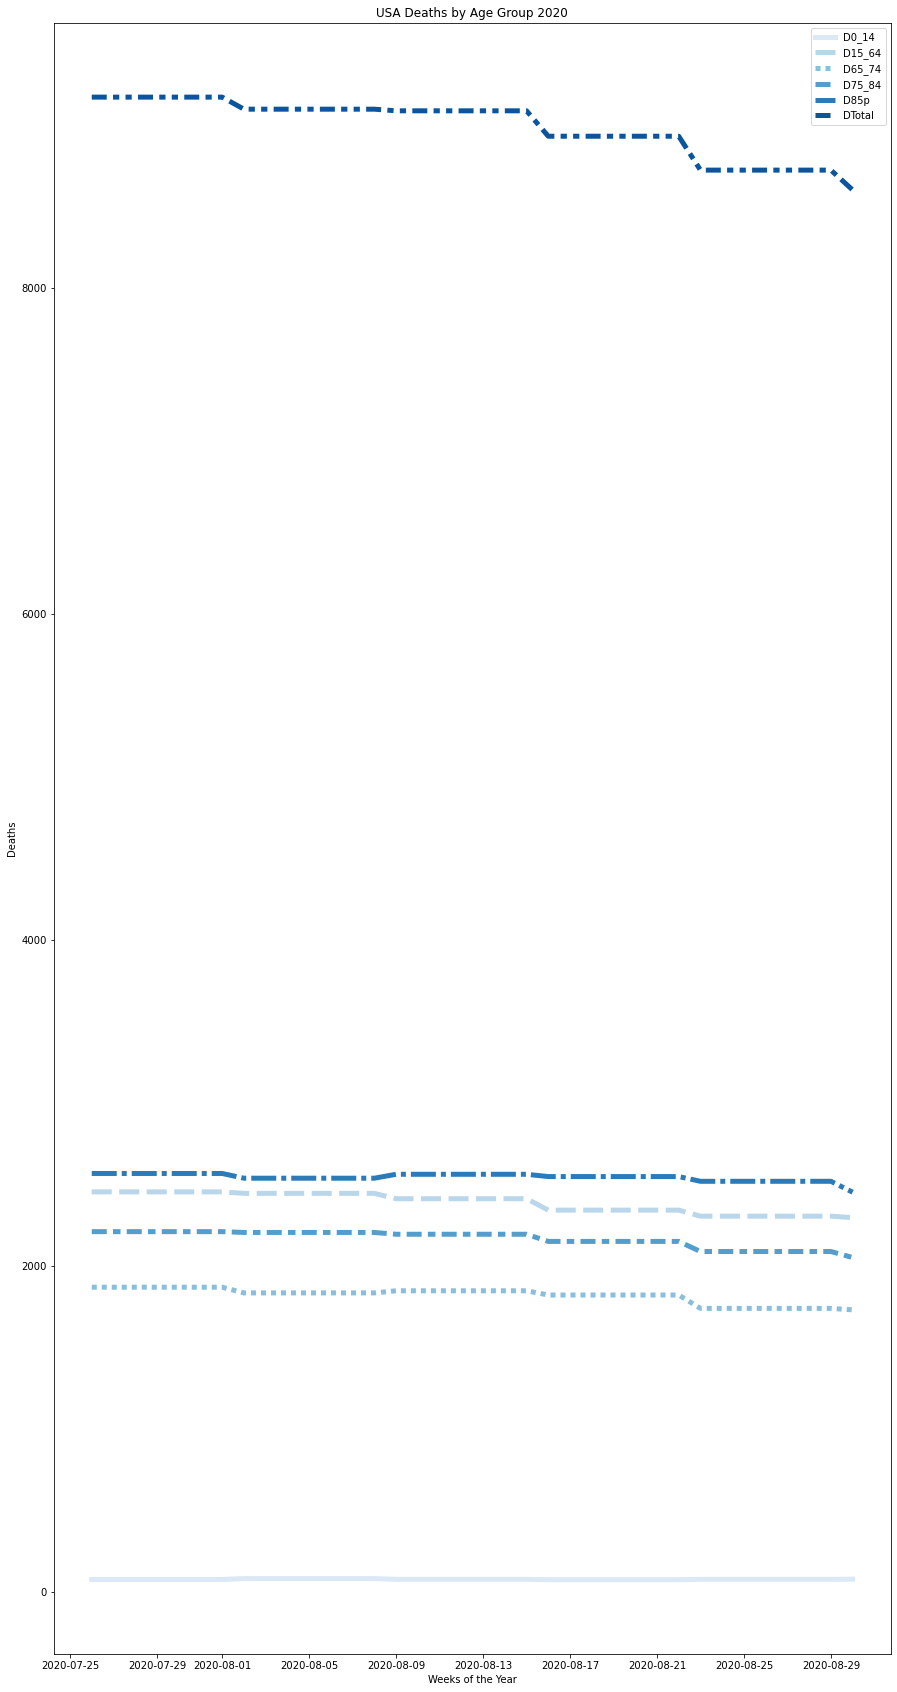

In [9]:
plt.figure(figsize=(15,30)) #make the graph bigger

g = sns.lineplot(data=dfTwitter, palette = 'Blues', label = '2020', linewidth=5)
g.legend(['D0_14', 'D15_64', 'D65_74', 'D75_84', 'D85p', 'DTotal'])




g.set(xlabel= 'Weeks of the Year', ylabel = 'Deaths', title= 'USA Deaths by Age Group 2020')

plt.show()

In [10]:
dfTwitter = dfTwitter.drop(columns = ['D0_14', 'D15_64', 'D65_74', 'D75_84', 'D85p'])

dfTwitter

,DTotal
Date,
2020-07-26,9172
2020-07-27,9172
2020-07-28,9172
2020-07-29,9172
2020-07-30,9172
2020-07-31,9172
2020-08-01,9172
2020-08-02,9098
2020-08-03,9098


In [11]:

deltaTwitter = []
days = list(int(i) for i in range(1, (len(dfTwitter) +1)))
Sdays = pd.Series(days)

dfTwitter['Date Range'] = days


dfTwitter

,DTotal,Date Range
Date,,
2020-07-26,9172,1
2020-07-27,9172,2
2020-07-28,9172,3
2020-07-29,9172,4
2020-07-30,9172,5
2020-07-31,9172,6
2020-08-01,9172,7
2020-08-02,9098,8
2020-08-03,9098,9


In [12]:
g1 = np.polyfit(dfTwitter['Date Range'], dfTwitter['DTotal'], 1) #use polyfit to get data points
fTwitter = np.poly1d(g1) #creates equation from data points

dfTwitter.insert(2, 'Regression', fTwitter(dfTwitter['Date Range']))
print(dfTwitter)
print(fTwitter)



            DTotal  Date Range   Regression
Date                                       
2020-07-26    9172           1  9257.666667
2020-07-27    9172           2  9242.466667
2020-07-28    9172           3  9227.266667
2020-07-29    9172           4  9212.066667
2020-07-30    9172           5  9196.866667
2020-07-31    9172           6  9181.666667
2020-08-01    9172           7  9166.466667
2020-08-02    9098           8  9151.266667
2020-08-03    9098           9  9136.066667
2020-08-04    9098          10  9120.866667
2020-08-05    9098          11  9105.666667
2020-08-06    9098          12  9090.466667
2020-08-07    9098          13  9075.266667
2020-08-08    9098          14  9060.066667
2020-08-09    9088          15  9044.866667
2020-08-10    9088          16  9029.666667
2020-08-11    9088          17  9014.466667
2020-08-12    9088          18  8999.266667
2020-08-13    9088          19  8984.066667
2020-08-14    9088          20  8968.866667
2020-08-15    9088          21  

 
-15.2 x + 9273


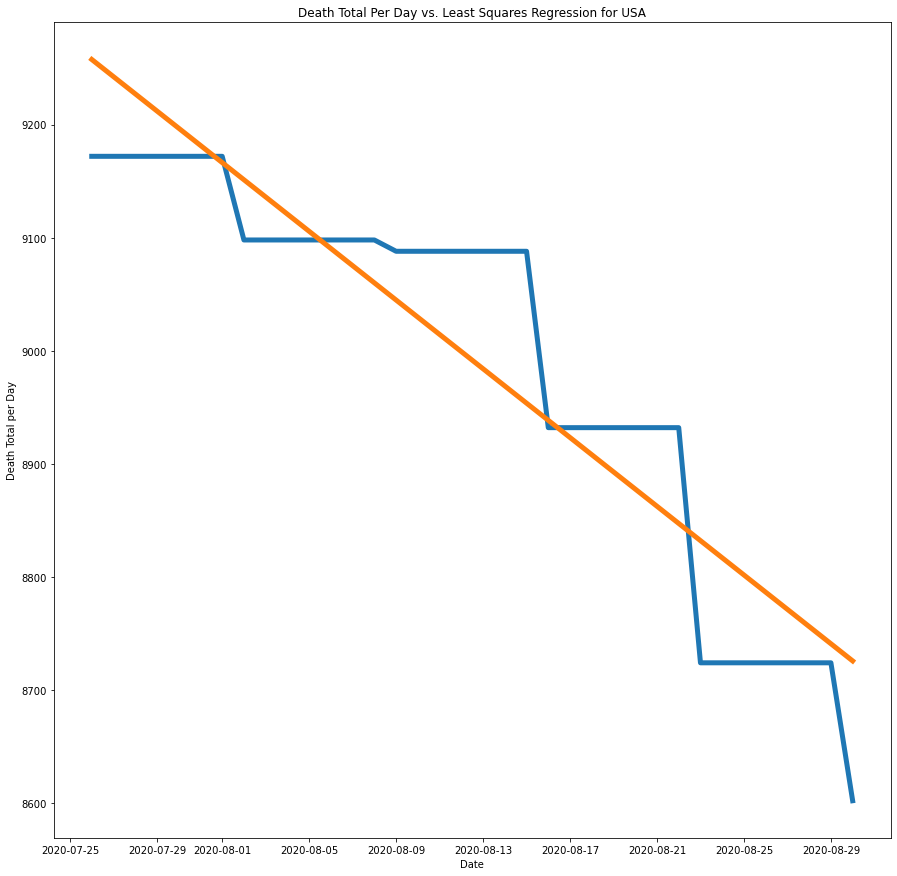

In [20]:
plt.figure(figsize=(15,15))

g.set(xlabel= 'Weeks of the Year', ylabel = 'Total Deaths per Day (Blue) vs. Least Squares Regression (Orange) for USA')

g = sns.lineplot(data=dfTwitter['DTotal'], palette = 'Blues', linewidth=5)
g = sns.lineplot(data=dfTwitter['Regression'], palette = 'Oranges', linewidth=5)

g.set(title= 'Death Total Per Day vs. Least Squares Regression for USA', xlabel= 'Date', ylabel = 'Death Total per Day')

print(fTwitter)
